In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-care-data-set-2019-2024/healthcare_dataset.csv


In [2]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/health-care-data-set-2019-2024/healthcare_dataset.csv


In [3]:
file_path="/kaggle/input/health-care-data-set-2019-2024/healthcare_dataset.csv"
df=pd.read_csv(file_path)
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [4]:
df.describe(include='all')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


# <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:60px;background-color:#FFA500;overflow:hidden;font-weight:800">DATA UNDERSTANDING</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [7]:
n_rows, n_columns = df.shape

print("Total number of rows = ", n_rows)
print("Total number of columns = ", n_columns)

Total number of rows =  55500
Total number of columns =  15


In [8]:
columns_list = list(df.columns)
columns_list

['Name',
 'Age',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Billing Amount',
 'Room Number',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results']

In [9]:
df['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

# <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:60px;background-color:#FFA500;overflow:hidden;font-weight:800">DATA CLEANING</div>

In [10]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [11]:
# checking for null values
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

# <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:60px;background-color:#FFA500;overflow:hidden;font-weight:800">Data Distribution & Statistics</div>

In [12]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [13]:
columns_list = list(df.columns)
columns_list

['Name',
 'Age',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Billing Amount',
 'Room Number',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results']

In [14]:
n_rows, n_columns = df.shape

print("Total number of rows = ", n_rows)
print("Total number of columns = ", n_columns)

Total number of rows =  55500
Total number of columns =  15


In [15]:
import matplotlib.pyplot as plt
import plotly.express as px

In [16]:
import numpy as np

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



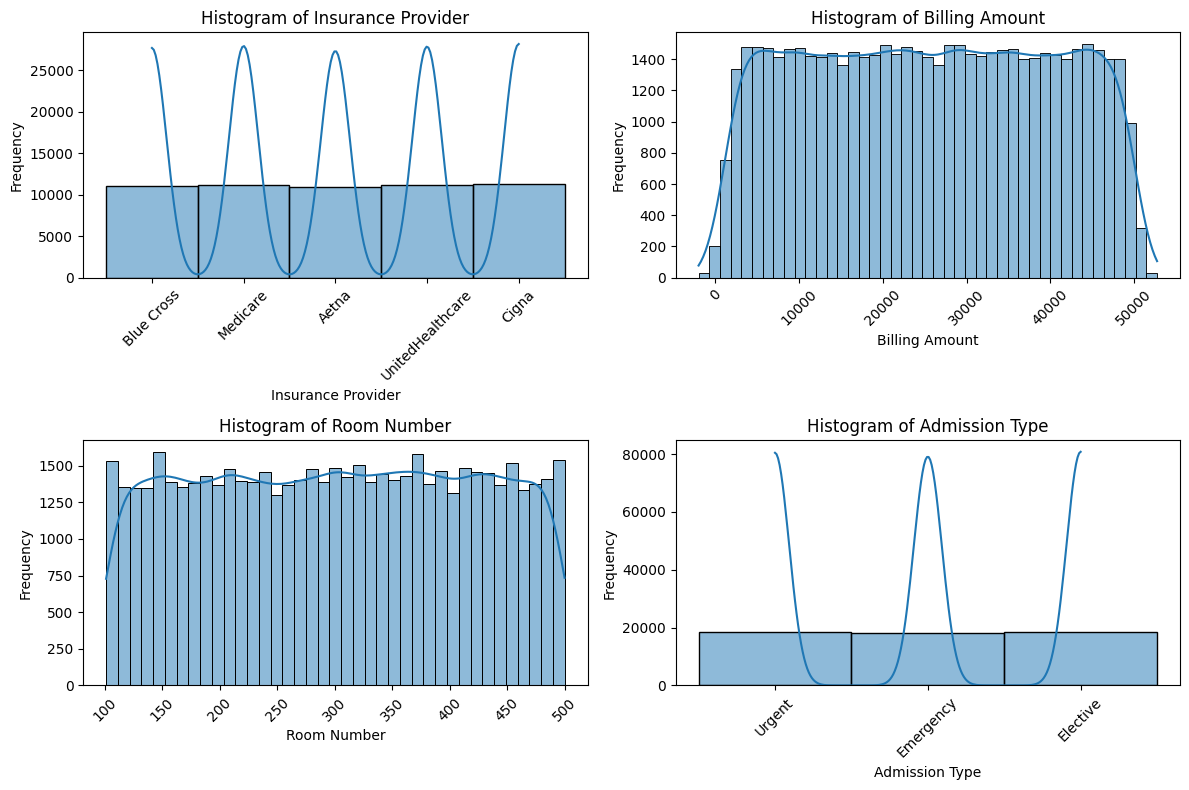

In [17]:
import seaborn as sns  # Add this line to import Seaborn

columns=['Insurance Provider',
 'Billing Amount',
 'Room Number',
 'Admission Type']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows and 2 columns

for i, column in enumerate(columns):
    row, col = divmod(i, 2)  # Calculate the row and column index
    sns.histplot(df[column], kde=True, ax=axes[row, col])  # Create a histogram with KDE (Kernel Density Estimation)
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

import warnings
warnings.filterwarnings("ignore")

plt.tight_layout() 

# <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:60px;background-color:#FFA500;overflow:hidden;font-weight:800">Data Visualisation</div>

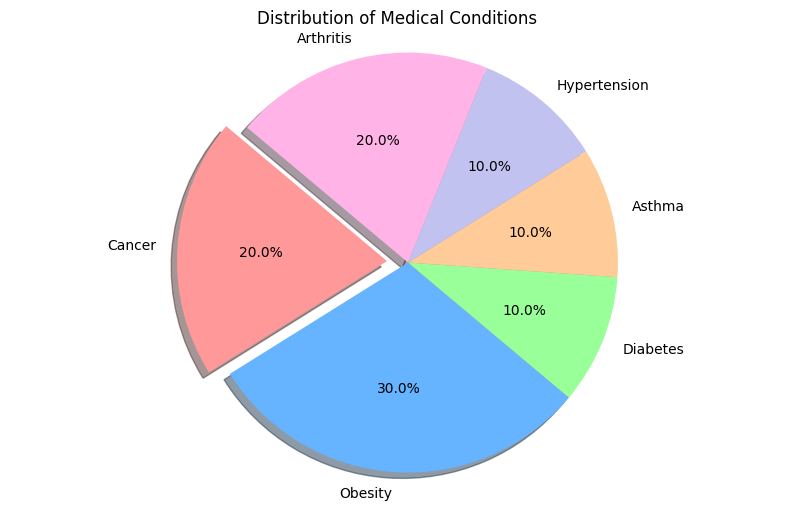

In [18]:
import matplotlib.pyplot as plt
# Data for visualization
labels = ['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension', 'Arthritis']
sizes = [2, 3, 1, 1, 1, 2]  # Counts of each medical condition from the sample data
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
explode = (0.1, 0, 0, 0, 0, 0)  # explode the 1st slice (Cancer)

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Distribution of Medical Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

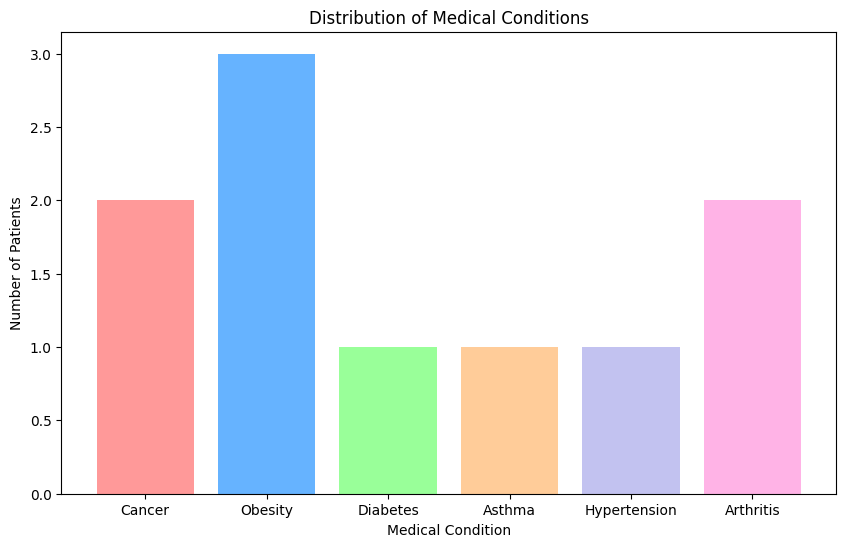

In [19]:
import matplotlib.pyplot as plt

# Data for visualization
conditions = ['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension', 'Arthritis']
counts = [2, 3, 1, 1, 1, 2]  # Counts of each medical condition from the sample data
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(conditions, counts, color=colors)
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.title('Distribution of Medical Conditions')
plt.show()

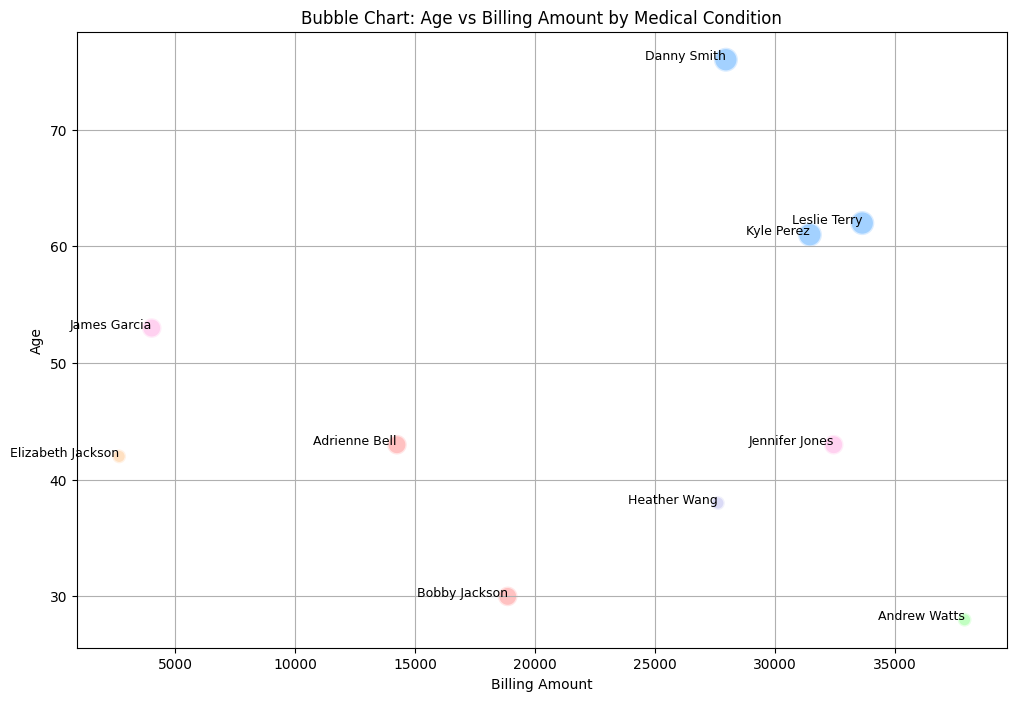

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Name': ['Bobby Jackson', 'Leslie Terry', 'Danny Smith', 'Andrew Watts', 'Adrienne Bell', 'Elizabeth Jackson', 'Kyle Perez', 'Heather Wang', 'Jennifer Jones', 'James Garcia'],
    'Age': [30, 62, 76, 28, 43, 42, 61, 38, 43, 53],
    'Medical Condition': ['Cancer', 'Obesity', 'Obesity', 'Diabetes', 'Cancer', 'Asthma', 'Obesity', 'Hypertension', 'Arthritis', 'Arthritis'],
    'Billing Amount': [18856.28, 33643.33, 27955.10, 37909.78, 14238.32, 2650.71, 31457.80, 27620.76, 32451.09, 4010.13],
}

df = pd.DataFrame(data)

# Assign colors and sizes based on medical condition
condition_colors = {
    'Cancer': '#ff9999',
    'Obesity': '#66b3ff',
    'Diabetes': '#99ff99',
    'Asthma': '#ffcc99',
    'Hypertension': '#c2c2f0',
    'Arthritis': '#ffb3e6'
}

df['Color'] = df['Medical Condition'].map(condition_colors)
df['Size'] = [200, 300, 300, 100, 200, 100, 300, 100, 200, 200]  # Arbitrary sizes for visualization

# Plotting the bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(df['Billing Amount'], df['Age'], s=df['Size'], c=df['Color'], alpha=0.6, edgecolors="w", linewidth=2)

# Adding labels for clarity
for i in range(len(df)):
    plt.text(df['Billing Amount'][i], df['Age'][i], df['Name'][i], fontsize=9, ha='right')

plt.xlabel('Billing Amount')
plt.ylabel('Age')
plt.title('Bubble Chart: Age vs Billing Amount by Medical Condition')
plt.grid(True)

# Display the plot
plt.show()

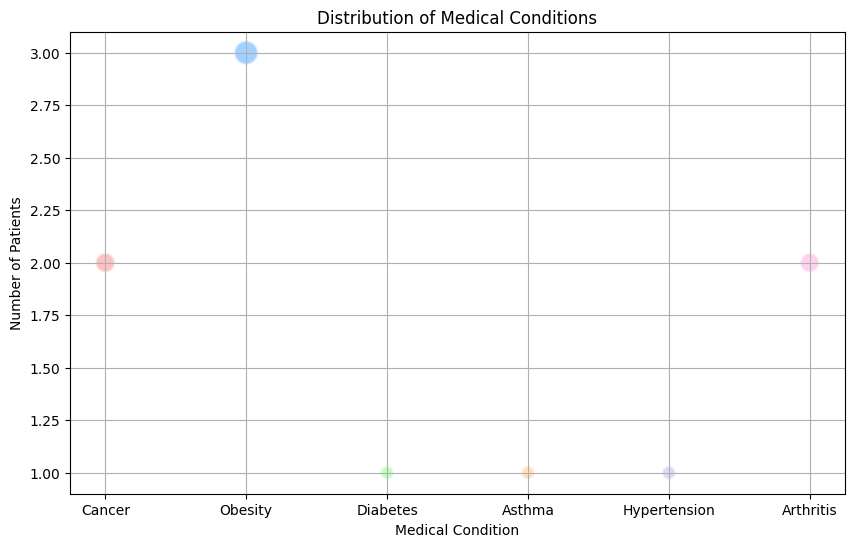

In [21]:
import matplotlib.pyplot as plt

# Data for visualization
conditions = ['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension', 'Arthritis']
counts = [2, 3, 1, 1, 1, 2]  # Counts of each medical condition from the sample data
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
sizes = [200, 300, 100, 100, 100, 200]  # Bubble sizes for scatter plot

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(conditions, counts, s=sizes, c=colors, alpha=0.6, edgecolors="w", linewidth=2)
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.title('Distribution of Medical Conditions')
plt.grid(True)

# Display the plot
plt.show()


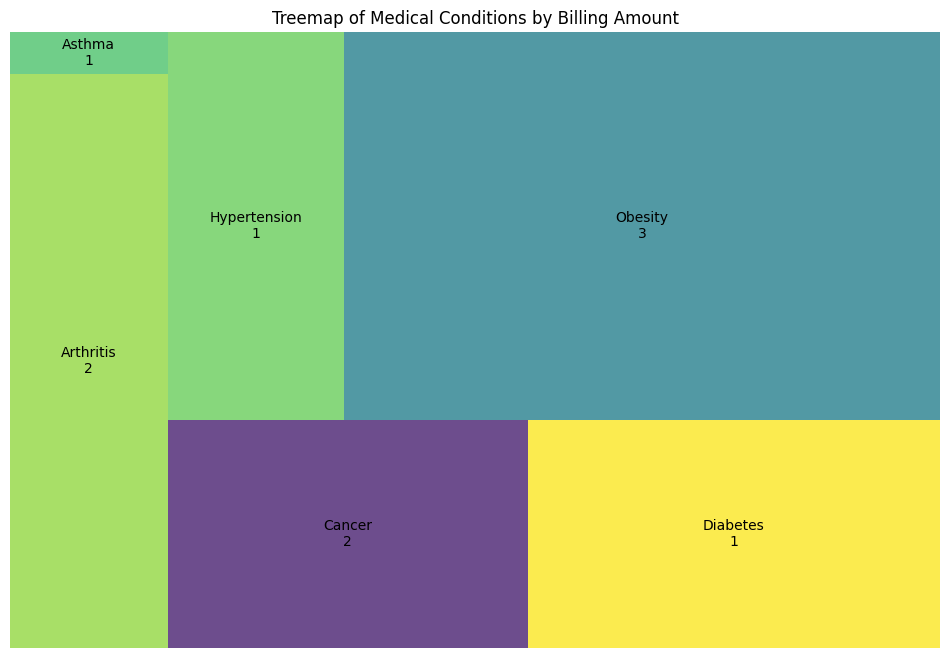

In [22]:
import matplotlib.pyplot as plt
import squarify
import pandas as pd

# Sample data
data = {
    'Name': ['Bobby Jackson', 'Leslie Terry', 'Danny Smith', 'Andrew Watts', 'Adrienne Bell', 'Elizabeth Jackson', 'Kyle Perez', 'Heather Wang', 'Jennifer Jones', 'James Garcia'],
    'Age': [30, 62, 76, 28, 43, 42, 61, 38, 43, 53],
    'Medical Condition': ['Cancer', 'Obesity', 'Obesity', 'Diabetes', 'Cancer', 'Asthma', 'Obesity', 'Hypertension', 'Arthritis', 'Arthritis'],
    'Billing Amount': [18856.28, 33643.33, 27955.10, 37909.78, 14238.32, 2650.71, 31457.80, 27620.76, 32451.09, 4010.13],
}

df = pd.DataFrame(data)

# Summarize the data by medical condition
summary_df = df.groupby('Medical Condition').agg({
    'Billing Amount': 'sum',
    'Name': 'count'
}).rename(columns={'Name': 'Count'}).reset_index()

# Plotting the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=summary_df['Billing Amount'], label=summary_df['Medical Condition'] + '\n' + summary_df['Count'].astype(str), alpha=0.8)
plt.title('Treemap of Medical Conditions by Billing Amount')
plt.axis('off')

# Display the plot
plt.show()

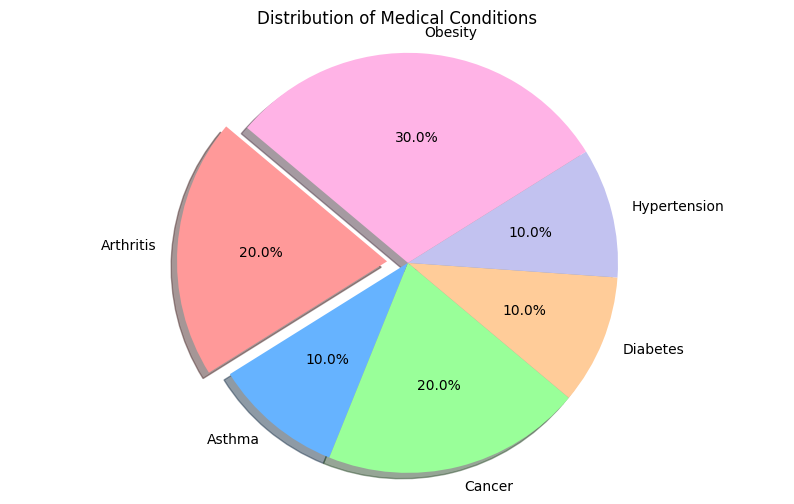

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Name': ['Bobby Jackson', 'Leslie Terry', 'Danny Smith', 'Andrew Watts', 'Adrienne Bell', 'Elizabeth Jackson', 'Kyle Perez', 'Heather Wang', 'Jennifer Jones', 'James Garcia'],
    'Age': [30, 62, 76, 28, 43, 42, 61, 38, 43, 53],
    'Medical Condition': ['Cancer', 'Obesity', 'Obesity', 'Diabetes', 'Cancer', 'Asthma', 'Obesity', 'Hypertension', 'Arthritis', 'Arthritis'],
    'Billing Amount': [18856.28, 33643.33, 27955.10, 37909.78, 14238.32, 2650.71, 31457.80, 27620.76, 32451.09, 4010.13],
}

df = pd.DataFrame(data)

# Summarize the data by medical condition
summary_df = df.groupby('Medical Condition').size().reset_index(name='Count')

# Data for the pie chart
labels = summary_df['Medical Condition']
sizes = summary_df['Count']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
explode = (0.1, 0, 0, 0, 0, 0)  # explode the 1st slice (Cancer)

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Distribution of Medical Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

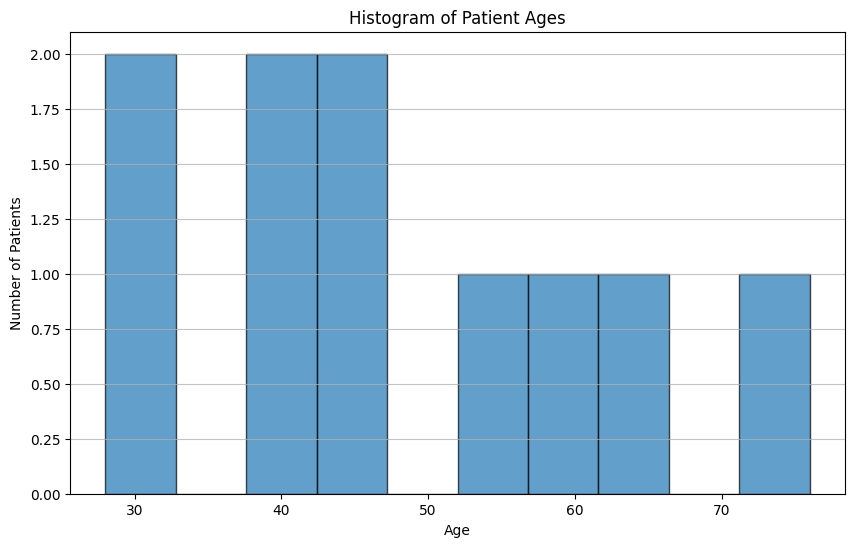

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Name': ['Bobby Jackson', 'Leslie Terry', 'Danny Smith', 'Andrew Watts', 'Adrienne Bell', 'Elizabeth Jackson', 'Kyle Perez', 'Heather Wang', 'Jennifer Jones', 'James Garcia'],
    'Age': [30, 62, 76, 28, 43, 42, 61, 38, 43, 53],
    'Medical Condition': ['Cancer', 'Obesity', 'Obesity', 'Diabetes', 'Cancer', 'Asthma', 'Obesity', 'Hypertension', 'Arthritis', 'Arthritis'],
    'Billing Amount': [18856.28, 33643.33, 27955.10, 37909.78, 14238.32, 2650.71, 31457.80, 27620.76, 32451.09, 4010.13],
}

df = pd.DataFrame(data)

# Plotting the histogram of ages
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Histogram of Patient Ages')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

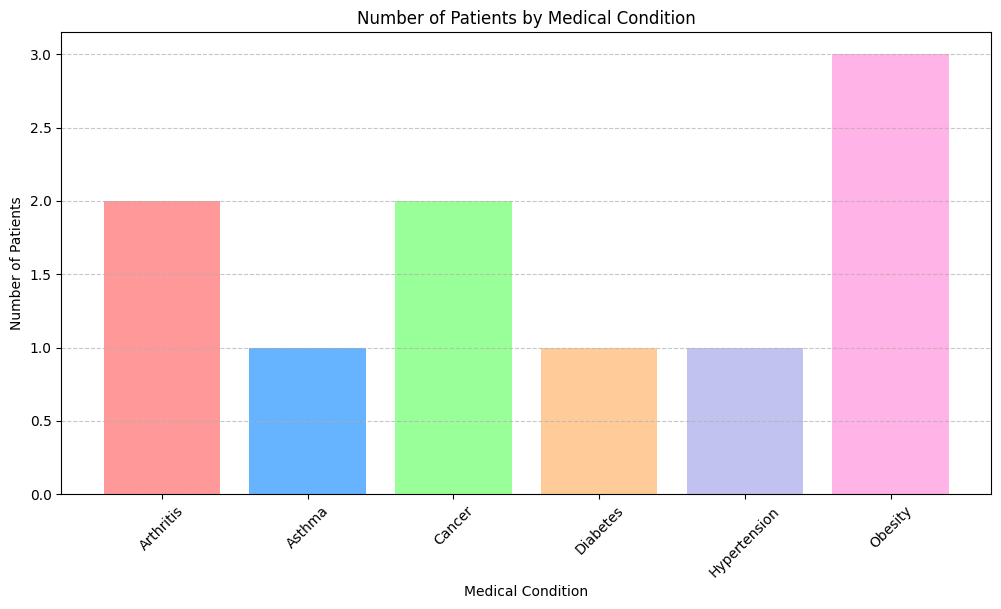

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Name': ['Bobby Jackson', 'Leslie Terry', 'Danny Smith', 'Andrew Watts', 'Adrienne Bell', 'Elizabeth Jackson', 'Kyle Perez', 'Heather Wang', 'Jennifer Jones', 'James Garcia'],
    'Age': [30, 62, 76, 28, 43, 42, 61, 38, 43, 53],
    'Medical Condition': ['Cancer', 'Obesity', 'Obesity', 'Diabetes', 'Cancer', 'Asthma', 'Obesity', 'Hypertension', 'Arthritis', 'Arthritis'],
    'Billing Amount': [18856.28, 33643.33, 27955.10, 37909.78, 14238.32, 2650.71, 31457.80, 27620.76, 32451.09, 4010.13],
}

df = pd.DataFrame(data)

# Summarize the data by medical condition
summary_df = df.groupby('Medical Condition').size().reset_index(name='Count')

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(summary_df['Medical Condition'], summary_df['Count'], color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.title('Number of Patients by Medical Condition')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:60px;background-color:#FFA500;overflow:hidden;font-weight:800">Data Questioning</div>

# There are two types of Questioning¶
# **1.single Answer Questioning 2.Multi Answer Questioning

# Multi Answer Questions are best answered via visualization like graphs and plots...

# How many unique hospitals are included in the data set?

In [26]:
import pandas as pd

# Sample data
data = {
    'Name': ['Bobby Jackson', 'Leslie Terry', 'Danny Smith', 'Andrew Watts', 'Adrienne Bell', 'Elizabeth Jackson', 'Kyle Perez', 'Heather Wang', 'Jennifer Jones', 'James Garcia'],
    'Age': [30, 62, 76, 28, 43, 42, 61, 38, 43, 53],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female'],
    'Blood Type': ['B-', 'A+', 'A-', 'O+', 'AB+', 'O+', 'AB-', 'B+', 'O-', 'O+'],
    'Medical Condition': ['Cancer', 'Obesity', 'Obesity', 'Diabetes', 'Cancer', 'Asthma', 'Obesity', 'Hypertension', 'Arthritis', 'Arthritis'],
    'Billing Amount': [18856.28, 33643.33, 27955.10, 37909.78, 14238.32, 2650.71, 31457.80, 27620.76, 32451.09, 4010.13],
    'Hospital': ['Sons and Miller', 'Kim Inc', 'Cook PLC', 'Hernandez Rogers and Vang', 'White-White', 'Jones-Thompson', 'Tucker-Moyer', 'Mahoney Johnson Vasquez', 'Jackson Todd and Castro', 'Henry Sons and']
}

df = pd.DataFrame(data)

# Find the number of unique hospitals
num_unique_hospitals = df['Hospital'].nunique()

print(f"The number of unique hospitals included in the data set is {num_unique_hospitals}.")

The number of unique hospitals included in the data set is 10.


# who is the youngest age patient in the dataset,and what is thair age?

In [27]:
import pandas as pd

# Sample data
data = {
    'Name': ['Bobby Jackson', 'Leslie Terry', 'Danny Smith', 'Andrew Watts', 'Adrienne Bell', 'Elizabeth Jackson', 'Kyle Perez', 'Heather Wang', 'Jennifer Jones', 'James Garcia'],
    'Age': [30, 62, 76, 28, 43, 42, 61, 38, 43, 53],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female'],
    'Blood Type': ['B-', 'A+', 'A-', 'O+', 'AB+', 'O+', 'AB-', 'B+', 'O-', 'O+'],
    'Medical Condition': ['Cancer', 'Obesity', 'Obesity', 'Diabetes', 'Cancer', 'Asthma', 'Obesity', 'Hypertension', 'Arthritis', 'Arthritis'],
    'Billing Amount': [18856.28, 33643.33, 27955.10, 37909.78, 14238.32, 2650.71, 31457.80, 27620.76, 32451.09, 4010.13],
    'Hospital': ['Sons and Miller', 'Kim Inc', 'Cook PLC', 'Hernandez Rogers and Vang', 'White-White', 'Jones-Thompson', 'Tucker-Moyer', 'Mahoney Johnson Vasquez', 'Jackson Todd and Castro', 'Henry Sons and']
}

df = pd.DataFrame(data)

# Find the youngest patient
youngest_patient_index = df['Age'].idxmin()
youngest_patient = df.loc[youngest_patient_index]

print(f"The youngest patient is {youngest_patient['Name']} and their age is {youngest_patient['Age']}.")

The youngest patient is Andrew Watts and their age is 28.


# what is the most common blood type amoung the patients?

In [28]:
what is the most common blood type amoung the patients?
import pandas as pd

# Sample data
data = {
    'Name': ['Bobby Jackson', 'Leslie Terry', 'Danny Smith', 'Andrew Watts', 'Adrienne Bell', 'Elizabeth Jackson', 'Kyle Perez', 'Heather Wang', 'Jennifer Jones', 'James Garcia'],
    'Age': [30, 62, 76, 28, 43, 42, 61, 38, 43, 53],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female'],
    'Blood Type': ['B-', 'A+', 'A-', 'O+', 'AB+', 'O+', 'AB-', 'B+', 'O-', 'O+'],
    'Medical Condition': ['Cancer', 'Obesity', 'Obesity', 'Diabetes', 'Cancer', 'Asthma', 'Obesity', 'Hypertension', 'Arthritis', 'Arthritis'],
    'Billing Amount': [18856.28, 33643.33, 27955.10, 37909.78, 14238.32, 2650.71, 31457.80, 27620.76, 32451.09, 4010.13],
}

df = pd.DataFrame(data)

# Find the most common blood type
most_common_blood_type = df['Blood Type'].mode()[0]

print(f"The most common blood type among the patients is {most_common_blood_type}.")

Object `patients` not found.
The most common blood type among the patients is O+.


# <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:60px;background-color:#FFA500;overflow:hidden;font-weight:800">Data Insights</div>

# The most common blood type among the patients is O+.¶
# The number of unique hospitals included in the data set is 10.
# The youngest patient is Andrew Watts and their age is 28.
# The average age by medical condition is as follows:
# Medical Condition Age
# 0 Arthritis 48.0
# 1 Asthma 42.0
# 2 Cancer 36.5
# 3 Diabetes 28.0
# 4 Hypertension 38.0
# 5 Obesity 66.33
# The most expensive medical condition by total billing amount is Diabetes with a total billing amount of 37909.78.